In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn import datasets

In [2]:
boston = pd.read_csv("boston_house.csv")

### 컬럼에 대한 설명
- CRIM: 범죄율 
- INDUS: 비소매상업지역 면적 비율 
- NOX: 일산화질소 농도 
- RM: 주택당 방 수 
- LSTAT: 인구 중 하위 계층 비율 
- B: 인구 중 흑인 비율 
- PTRATIO: 학생/교사 비율 
- ZN: 25,000 평방피트를 초과 거주지역 비율 
- CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0 
- AGE: 1940년 이전에 건축된 주택의 비율 
- RAD: 방사형 고속도로까지의 거리 
- DIS: 직업센터의 거리 
- TAX: 재산세율'''

- 데이터 분포
- 상관계수 확인

--- ols 확인

- VIF 다중공선성 확인

--- ols 확인

- 해당변수 스케일링 진행
- 변수 최적 찾아보기

- 다중회귀 (y값에 대한 여러가지 컬럼) boston 데이터

In [3]:
boston.columns

Index(['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'ZN', 'TAX', 'CHAS', 'Target'],
      dtype='object')

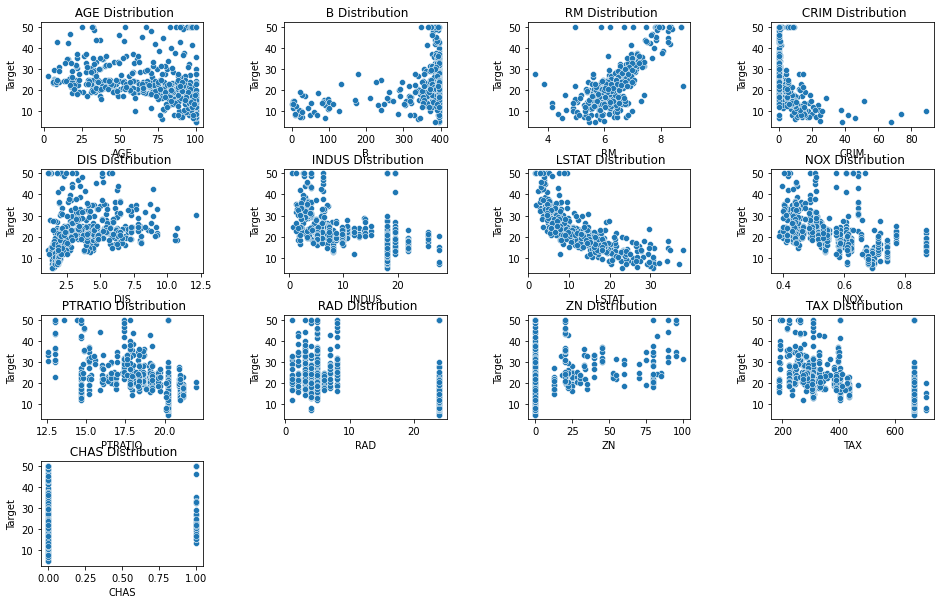

In [4]:
# y값과 변수들 간의 관계
# 회귀 : 선형적인 관계를 찾는 것
# 실제 Target와 변수들의 관계를 확인해보자!

import matplotlib.gridspec as gridspec
plt.figure(figsize=(16,10))
plt.subplots_adjust(wspace=0.5, hspace=0.4)
grid = gridspec.GridSpec(4,4)

bst_feature = ['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'ZN', 'TAX', 'CHAS']

for idx, feature in enumerate(bst_feature):
    ax = plt.subplot(grid[idx])
    sns.scatterplot(x=feature, y="Target", data=boston, ax=ax)
    ax.set_title(f' {feature} Distribution')

- y값과 다른 변수들의 관계를 시각화로 확인하기
- 눈으로 확인하는 것 외에 상관계수

In [5]:
boston.corr(method="pearson")

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
AGE,1.000000,-0.273534,-0.240265,0.352734,-0.747881,0.644779,0.602339,0.731470,0.261515,0.456022,-0.569537,0.506456,0.086518,-0.376955
B,-0.273534,1.000000,0.128069,-0.385064,0.291512,-0.356977,-0.366087,-0.380051,-0.177383,-0.444413,0.175520,-0.441808,0.048788,0.333461
RM,-0.240265,0.128069,1.000000,-0.219247,0.205246,-0.391676,-0.613808,-0.302188,-0.355501,-0.209847,0.311991,-0.292048,0.091251,0.695360
CRIM,0.352734,-0.385064,-0.219247,1.000000,-0.379670,0.406583,0.455621,0.420972,0.289946,0.625505,-0.200469,0.582764,-0.055892,-0.388305
DIS,-0.747881,0.291512,0.205246,-0.379670,1.000000,-0.708027,-0.496996,-0.769230,-0.232471,-0.494588,0.664408,-0.534432,-0.099176,0.249929
INDUS,0.644779,-0.356977,-0.391676,0.406583,-0.708027,1.000000,0.603800,0.763651,0.383248,0.595129,-0.533828,0.720760,0.062938,-0.483725
LSTAT,0.602339,-0.366087,-0.613808,0.455621,-0.496996,0.603800,1.000000,0.590879,0.374044,0.488676,-0.412995,0.543993,-0.053929,-0.737663
NOX,0.731470,-0.380051,-0.302188,0.420972,-0.769230,0.763651,0.590879,1.000000,0.188933,0.611441,-0.516604,0.668023,0.091203,-0.427321
PTRATIO,0.261515,-0.177383,-0.355501,0.289946,-0.232471,0.383248,0.374044,0.188933,1.000000,0.464741,-0.391679,0.460853,-0.121515,-0.507787
RAD,0.456022,-0.444413,-0.209847,0.625505,-0.494588,0.595129,0.488676,0.611441,0.464741,1.000000,-0.311948,0.910228,-0.007368,-0.381626


<AxesSubplot:>

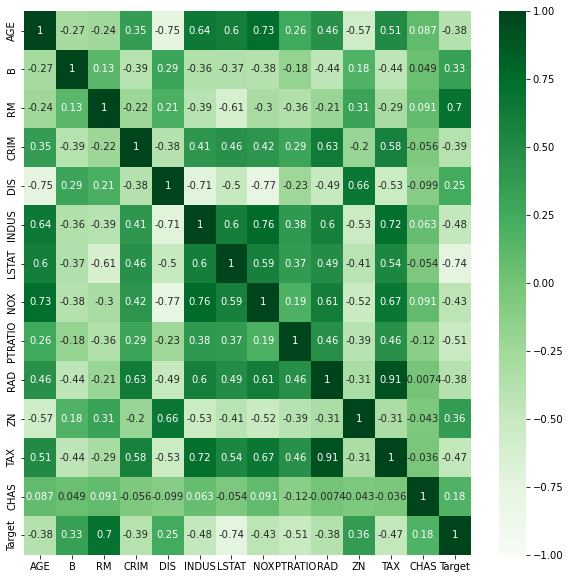

In [6]:
# heatmap으로 확인하기
plt.rcParams["figure.figsize"]=(10,10)
sns.heatmap(boston.corr(), annot=True, cmap="Greens", vmin=-1, vmax=1)

- 각 변수들 간의 관계와 y값의 관계를 확인해서 최적의 변수를 선택하기 위한 작업을 진행
- 실제 작업할 때에는 오랜 시간 고민하고 값들을 확인해야 한다.

In [7]:
model = sm.OLS.from_formula("Target~"+"+".join(bst_feature), data=boston)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 03 Jun 2023   Prob (F-statistic):          6.72e-135
Time:                        17:07:34   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
B              0.0093      0.003      3.467      0.001       0.004       0.015
RM             3.8099      0.418      9.116      0.000       2.989       4.631
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- pvalue를 통한 변수 제거 후 ols 진행

In [8]:
bst_feature1 = ['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'ZN', 'TAX', 'CHAS']

In [9]:
model1 = sm.OLS.from_formula("Target~"+"+".join(bst_feature1), data=boston)
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 03 Jun 2023   Prob (F-statistic):          6.72e-135
Time:                        17:07:34   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
B              0.0093      0.003      3.467      0.001       0.004       0.015
RM             3.8099      0.418      9.116      0.000       2.989       4.631
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 유의미하지 않은 변수를 제거했을 때 값들이 변하는 것을 확인
- 단순선형회귀로만 진행할 시?

In [10]:
bst_feature2 = ['RM']

In [11]:
model2 = sm.OLS.from_formula("Target~"+"+".join(bst_feature2), data=boston)
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           2.49e-74
Time:                        17:07:34   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
bst_feature3 = ['RM', "LSTAT"]

In [13]:
model3 = sm.OLS.from_formula("Target~"+"+".join(bst_feature3), data=boston)
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Sat, 03 Jun 2023   Prob (F-statistic):          7.01e-112
Time:                        17:07:34   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.669      -7.592       4.875
RM             5.0948      0.444     11.463      0.000       4.222       5.968
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 단순 선형회귀보다 다중회귀를 통해 설명 가능한 변수를 추가하는 것이 실제 R^2이 더 높아지고 회귀식에 대한 설명도가 높아지는 것을 확인했다.

### 선형회귀 분석의 가정
> #### 선형성
>- 비선형 회귀는 분석하기 어렵고 선형성이라는 것이 중요하다.
>- 예측하고자 하는 종속변수 Target과 독립변수 x 간의 선형성을 만족하는 특성을 의미함
>- 만약 변수 중에 선형성을 만족하지 못하는 경우
>- 1. 선형적인 변수는 빼거나 새로운 변수를 찾기
>- 2. 로그, 지수 변수 변환하기
>- 3. 선형적인 변수들만 가지고 회귀식을 만들고 추가적으로 비선형적인 것들을 더하는 식의 변수 선택법 분석도 가능


>#### 독립성
>- 다중회귀분석은 기본적으로 독립변수 x 간에 상관관계가 없이 독립성을 만족해야한다.
>- 다중공선성을 확인하고 이걸 통해 변수를 제거하는 식으로 회귀식을 만든다.

>#### 등분산성
>- 예측값과 잔차에 대한 내용

>#### 정규성
>- 예측값과 잔차에 대한 내용, qqplot을 통해 확인

### 다중공선성을 체크하여 변수를 확인해 보자!
- 독립변수들 간에 강한 상관관계가 나타나면, 회귀분석의 전제가정인 독립변수들 간에 상관관계가 높으면 안된다는 조건을 위배


- 다중공선성이 높은 경우
- 1. 다중공선성이 높은 변수 선택을 해서 제거하는 법
- 2. PCA를 통해서 의존적인 성분을 삭제하는 법
- 3. 정규화 방법도 있음

In [14]:
bst_feature

['AGE',
 'B',
 'RM',
 'CRIM',
 'DIS',
 'INDUS',
 'LSTAT',
 'NOX',
 'PTRATIO',
 'RAD',
 'ZN',
 'TAX',
 'CHAS']

In [15]:
boston_sp1 = boston.loc[:, bst_feature]

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF factor"] = [variance_inflation_factor(boston_sp1, i) for i in range(boston_sp1.shape[1])]
vif["features"] = boston_sp1.columns
vif = vif.sort_values("VIF factor").reset_index(drop=True)
vif

,VIF factor,features
0,1.152952,CHAS
1,2.100373,CRIM
2,2.844013,ZN
3,11.102025,LSTAT
4,14.485758,INDUS
5,14.699652,DIS
6,15.167725,RAD
7,20.104943,B
8,21.386850,AGE
9,61.227274,TAX


- vif 값 계수가 높다
- 10 이하인 값으로 맞춰주고, 10 이상이면 다중공선성이 높다고 본다.
- 다중공선성은 서로 변수들 간의 관계이기 때문에 변수를 제거하게 되면 값들 자체도 변경이 된다.

In [17]:
bst_feature_vif1 = ['B',
 'RM',
 'CRIM',
 'DIS',
 'LSTAT',
 'NOX',
 'RAD',
 'ZN',
 'TAX',
 'CHAS']

In [18]:
boston_sp1 = boston.loc[:, bst_feature_vif1]

In [19]:
vif = pd.DataFrame()
vif["VIF factor"] = [variance_inflation_factor(boston_sp1, i) for i in range(boston_sp1.shape[1])]
vif["features"] = boston_sp1.columns
vif = vif.sort_values("VIF factor").reset_index(drop=True)
vif

,VIF factor,features
0,1.130217,CHAS
1,2.096229,CRIM
2,2.330543,ZN
3,8.719382,LSTAT
4,10.005240,DIS
5,13.978236,RAD
6,18.556393,B
7,46.293286,TAX
8,55.332168,RM
9,62.872073,NOX


In [20]:
bst_feature_vif1=[
 'CRIM',
 'DIS',
 'LSTAT',
 'ZN',
 'CHAS']

In [21]:
boston_sp1 = boston.loc[:, bst_feature_vif1]

In [22]:
vif = pd.DataFrame()
vif["VIF factor"] = [variance_inflation_factor(boston_sp1, i) for i in range(boston_sp1.shape[1])]
vif["features"] = boston_sp1.columns
vif = vif.sort_values("VIF factor").reset_index(drop=True)
vif

,VIF factor,features
0,1.051555,CHAS
1,1.567711,CRIM
2,2.232598,ZN
3,3.088560,LSTAT
4,3.916175,DIS


- 무작정 다중공선성이 높다고 높은 변수들만 삭제해버리면 기본의 컬럼에 대한 도메인이 없어지고 수치로만 해석하게 되는 상황이 발생
- 방의 개수와 집값이랑 당연히 관계가 높다고 생각하는데 무작정 vif 수치만 보고 제거하게 되면 더 중요한 변수를 놓칠 수 있다.
- 꼭 수치만 보고 작업하는 것이 아니라 ***

In [23]:
boston_sp1

,CRIM,DIS,LSTAT,ZN,CHAS
0,0.00632,4.0900,4.98,18.0,0
1,0.02731,4.9671,9.14,0.0,0
2,0.02729,4.9671,4.03,0.0,0
3,0.03237,6.0622,2.94,0.0,0
4,0.06905,6.0622,5.33,0.0,0
...,...,...,...,...,...
501,0.06263,2.4786,9.67,0.0,0
502,0.04527,2.2875,9.08,0.0,0
503,0.06076,2.1675,5.64,0.0,0
504,0.10959,2.3889,6.48,0.0,0


In [24]:
boston_sp1["Target"] = boston["Target"]

In [25]:
model4 = sm.OLS.from_formula("Target~"+"+".join(bst_feature_vif1), data=boston_sp1)
res4 = model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     159.8
Date:                Sat, 03 Jun 2023   Prob (F-statistic):          3.25e-101
Time:                        17:07:34   Log-Likelihood:                -1598.7
No. Observations:                 506   AIC:                             3209.
Df Residuals:                     500   BIC:                             3235.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.6749      0.982     39.382      0.000      36.745      40.604
CRIM          -0.1260      0.034     -3.668      0.000      -0.194      -0.059
DIS           -1.3574      0.178     -7.617      0.000      -1.708      -1.007
LSTAT         -0.9414      0.044    -21.193      0.000      -1.029      -0.854
ZN             0.0970      0.015      6.520      0.000       0.068       0.126
CHAS           3.9447      1.020      3.869      0.000       1.942       5.948
==============================================================================
Omnibus:                      114.340   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.265
Skew:                           1.252   Prob(JB):                     3.30e-49
Kurtosis:                       5.078   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 스케일링을 통한 회귀식 변화

In [26]:
boston_1 = boston.copy()

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(boston_1)
boston_sc1 = scaler.transform(boston_1)

In [28]:
boston_sc1

array([[-0.12001342,  0.44105193,  0.41367189, ..., -0.66660821,
        -0.27259857,  0.15968566],
       [ 0.36716642,  0.44105193,  0.19427445, ..., -0.98732948,
        -0.27259857, -0.10152429],
       [-0.26581176,  0.39642699,  1.28271368, ..., -0.98732948,
        -0.27259857,  1.32424667],
       ...,
       [ 0.79744934,  0.44105193,  0.98496002, ..., -0.80321172,
        -0.27259857,  0.14880191],
       [ 0.73699637,  0.4032249 ,  0.72567214, ..., -0.80321172,
        -0.27259857, -0.0579893 ],
       [ 0.43473151,  0.44105193, -0.36276709, ..., -0.80321172,
        -0.27259857, -1.15724782]])

In [29]:
boston_sc1 = pd.DataFrame(boston_sc1, columns=boston_1.columns)

In [30]:
boston_sc1

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,-0.120013,0.441052,0.413672,-0.419782,0.140214,-1.287909,-1.075562,-0.144217,-1.459000,-0.982843,0.284830,-0.666608,-0.272599,0.159686
1,0.367166,0.441052,0.194274,-0.417339,0.557160,-0.593381,-0.492439,-0.740262,-0.303094,-0.867883,-0.487722,-0.987329,-0.272599,-0.101524
2,-0.265812,0.396427,1.282714,-0.417342,0.557160,-0.593381,-1.208727,-0.740262,-0.303094,-0.867883,-0.487722,-0.987329,-0.272599,1.324247
3,-0.809889,0.416163,1.016303,-0.416750,1.077737,-1.306878,-1.361517,-0.835284,0.113032,-0.752922,-0.487722,-1.106115,-0.272599,1.182758
4,-0.511180,0.441052,1.228577,-0.412482,1.077737,-1.306878,-1.026501,-0.835284,0.113032,-0.752922,-0.487722,-1.106115,-0.272599,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.018673,0.387217,0.439316,-0.413229,-0.625796,0.115738,-0.418147,0.158124,1.176466,-0.982843,-0.487722,-0.803212,-0.272599,-0.014454
502,0.288933,0.441052,-0.234548,-0.415249,-0.716639,0.115738,-0.500850,0.158124,1.176466,-0.982843,-0.487722,-0.803212,-0.272599,-0.210362
503,0.797449,0.441052,0.984960,-0.413447,-0.773684,0.115738,-0.983048,0.158124,1.176466,-0.982843,-0.487722,-0.803212,-0.272599,0.148802
504,0.736996,0.403225,0.725672,-0.407764,-0.668437,0.115738,-0.865302,0.158124,1.176466,-0.982843,-0.487722,-0.803212,-0.272599,-0.057989


In [31]:
boston_sc1.columns

Index(['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'ZN', 'TAX', 'CHAS', 'Target'],
      dtype='object')

In [32]:
bst_sc1_col = ['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'ZN', 'TAX', 'CHAS']

In [33]:
boston_sc1 = boston_sc1.loc[:,bst_sc1_col]

In [34]:
vif = pd.DataFrame()
vif["VIF factor"] = [variance_inflation_factor(boston_sc1, i) for i in range(boston_sc1.shape[1])]
vif["features"] = boston_sc1.columns
vif = vif.sort_values("VIF factor").reset_index(drop=True)
vif

,VIF factor,features
0,1.073995,CHAS
1,1.348521,B
2,1.792192,CRIM
3,1.799084,PTRATIO
4,1.933744,RM
5,2.298758,ZN
6,2.941491,LSTAT
7,3.100826,AGE
8,3.955945,DIS
9,3.991596,INDUS


- 스케일링을 하기 전과 후, 다중공선성이 많이 줄어듦

- 스케일링 후 진행

In [35]:
boston_sc1["Target"] = boston["Target"]

In [36]:
model5 = sm.OLS.from_formula("Target~"+"+".join(bst_sc1_col), data=boston_sc1)
res5 = model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 03 Jun 2023   Prob (F-statistic):          6.72e-135
Time:                        17:07:35   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5328      0.211    106.814      0.000      22.118      22.947
AGE            0.0195      0.371      0.052      0.958      -0.710       0.749
B              0.8493      0.245      3.467      0.001       0.368       1.331
RM             2.6742      0.293      9.116      0.000       2.098       3.251
CRIM          -0.9281      0.282     -3.287      0.001      -1.483      -0.373
DIS           -3.1040      0.420     -7.398      0.000      -3.928      -2.280
INDUS          0.1409      0.421      0.334      0.738      -0.687       0.969
LSTAT         -3.7436      0.362    -10.347      0.000      -4.454      -3.033
NOX           -2.0567      0.442     -4.651      0.000      -2.926      -1.188
PTRATIO       -2.0606      0.283     -7.283      0.000      -2.617      -1.505
RAD            2.6622      0.577      4.613      0.000       1.528       3.796
ZN             1.0816      0.320      3.382      0.001       0.453       1.710
TAX           -2.0768      0.633     -3.280      0.001      -3.321      -0.833
CHAS           0.6817      0.219      3.118      0.002       0.252       1.111
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                         9.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 스케일링도 변수마다 다 다르게 진행해야 한다.
- 변수에 대한 분포를 보고 어떤 스케일링을 할지 나눠서 생각해 볼 수 있다.

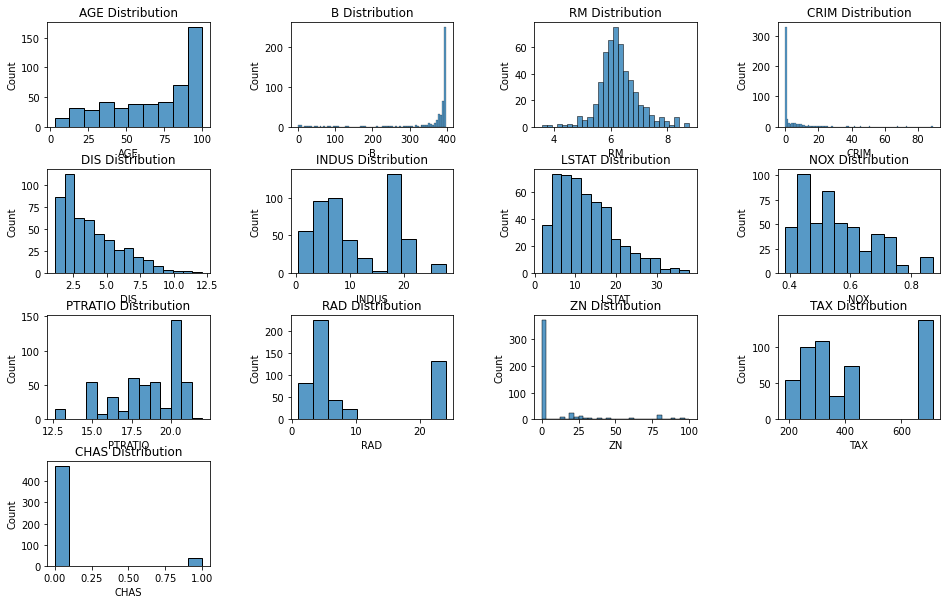

In [37]:
#y 값과 변수들간의 관계
#회귀를 선형적인 관계를 찾는 것 
#실제 Target과 변수들의 관계를 확인해 보자!

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(4,4)
plt.figure(figsize=(16,10))
plt.subplots_adjust(wspace= 0.5, hspace= 0.4)


bst_feature = ['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'ZN', 'TAX', 'CHAS']

for idx, feature in enumerate(bst_feature):
    ax = plt.subplot(grid[idx])
    
    sns.histplot(x=boston[feature],
                ax=ax)
    ax.set_title(f'{feature} Distribution')

In [38]:
boston.columns

Index(['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'ZN', 'TAX', 'CHAS', 'Target'],
      dtype='object')

In [39]:
import numpy as np

In [40]:
boston_lg1=np.log1p(boston[['B','CRIM','ZN','CHAS']])

scaler.fit(boston[['RM','DIS','INDUS','LSTAT','NOX','PTRATIO','RAD','TAX']])
boston_sc1 =scaler.transform(boston[['RM','DIS','INDUS','LSTAT','NOX','PTRATIO','RAD','TAX']])

In [41]:
boston_sc1= pd.DataFrame(boston_sc1,columns=['RM','DIS','INDUS','LSTAT','NOX','PTRATIO','RAD','TAX'])

In [42]:
boston_sc1.columns

Index(['RM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD', 'TAX'], dtype='object')

In [43]:
boston_fin = pd.concat([boston_lg1, boston_sc1], axis=1)

In [44]:
boston_fin

,B,CRIM,ZN,CHAS,RM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,TAX
0,5.986201,0.006300,2.944439,0.0,0.413672,0.140214,-1.287909,-1.075562,-0.144217,-1.459000,-0.982843,-0.666608
1,5.986201,0.026944,0.000000,0.0,0.194274,0.557160,-0.593381,-0.492439,-0.740262,-0.303094,-0.867883,-0.987329
2,5.975919,0.026924,0.000000,0.0,1.282714,0.557160,-0.593381,-1.208727,-0.740262,-0.303094,-0.867883,-0.987329
3,5.980479,0.031857,0.000000,0.0,1.016303,1.077737,-1.306878,-1.361517,-0.835284,0.113032,-0.752922,-1.106115
4,5.986201,0.066770,0.000000,0.0,1.228577,1.077737,-1.306878,-1.026501,-0.835284,0.113032,-0.752922,-1.106115
...,...,...,...,...,...,...,...,...,...,...,...,...
501,5.973784,0.060747,0.000000,0.0,0.439316,-0.625796,0.115738,-0.418147,0.158124,1.176466,-0.982843,-0.803212
502,5.986201,0.044275,0.000000,0.0,-0.234548,-0.716639,0.115738,-0.500850,0.158124,1.176466,-0.982843,-0.803212
503,5.986201,0.058986,0.000000,0.0,0.984960,-0.773684,0.115738,-0.983048,0.158124,1.176466,-0.982843,-0.803212
504,5.977492,0.103991,0.000000,0.0,0.725672,-0.668437,0.115738,-0.865302,0.158124,1.176466,-0.982843,-0.803212


In [45]:
boston_fin_col = boston_fin.columns

In [46]:
boston_fin_col

Index(['B', 'CRIM', 'ZN', 'CHAS', 'RM', 'DIS', 'INDUS', 'LSTAT', 'NOX',
       'PTRATIO', 'RAD', 'TAX'],
      dtype='object')

In [47]:
boston_tar = np.log1p(boston["Target"])

In [48]:
boston_fin["Target"] = boston_tar

In [49]:
model6 = sm.OLS.from_formula("Target~"+"+".join(boston_fin_col), data=boston_fin)
res6 = model6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     146.5
Date:                Sat, 03 Jun 2023   Prob (F-statistic):          5.97e-154
Time:                        17:07:58   Log-Likelihood:                 147.19
No. Observations:                 506   AIC:                            -268.4
Df Residuals:                     493   BIC:                            -213.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8854      0.078     36.850      0.000       2.732       3.039
B              0.0505      0.013      4.019      0.000       0.026       0.075
CRIM          -0.1296      0.023     -5.669      0.000      -0.175      -0.085
ZN             0.0082      0.008      1.014      0.311      -0.008       0.024
CHAS           0.1418      0.048      2.956      0.003       0.048       0.236
RM             0.0664      0.011      5.991      0.000       0.045       0.088
DIS           -0.0925      0.016     -5.909      0.000      -0.123      -0.062
INDUS          0.0197      0.016      1.209      0.227      -0.012       0.052
LSTAT         -0.1910      0.013    -14.303      0.000      -0.217      -0.165
NOX           -0.0656      0.017     -3.943      0.000      -0.098      -0.033
PTRATIO       -0.0847      0.011     -7.488      0.000      -0.107      -0.062
RAD            0.1664      0.027      6.126      0.000       0.113       0.220
TAX           -0.0908      0.024     -3.793      0.000      -0.138      -0.044
==============================================================================
Omnibus:                       70.979   Durbin-Watson:                   1.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              264.862
Skew:                           0.585   Prob(JB):                     3.06e-58
Kurtosis:                       6.346   Cond. No.                         59.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 필수과제
- KNN 회귀, 다중회귀
- 이 두가지의 모델링을 가지고 예측 값을 비교한다.
- train, test를 나눠서 예측값을 비교하고 비교는 RMSE 그 외 지표를 비교해도 됩니다.
- 예측값이 나오면 잔차 비교가 가능하다.
- 잔차에 대한 정규성, 등분산성, 독립성 등을 체크해서 코드와 주석을 달아 정리해주세요.

- 본인만의 로직으로 변수들을 선택해서 해당 변수를 선택한 후에 KNN, 다중회귀를 진행하는 것
- 예측 -> 예측값을 가지고 잔차에 대한 검정, RMSE 예측값도 비교!

- 발표할 예정이고, 랜덤으로 지정하겠습니다.